In [1]:
import tensorflow as tf
from model import build_model, plot_training
import load_data
import random
import os
from datetime import datetime
import numpy as np

# device_name = tf.test.gpu_device_name()
# if not device_name:
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

SEED = 42
# for reproducability
def reset_random():
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  tf.random.set_seed(SEED)
  random.seed(SEED)
reset_random()

2.4.1


In [2]:
epochs = 50
input_dims = 32
(train_data, val_data, test_data) = load_data.load_data_gen(input_dims, seed=SEED)

model = build_model(input_dims=input_dims, n_classes=len(train_data.class_indices.keys()))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
#
# tboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs,
#                                                  histogram_freq=1,
#                                                  profile_batch='500,520')
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    # callbacks=[tboard_callback]
)
print(f"Final training loss: {history.history['loss'][-1]}")
print(f"Final training acc: {history.history['accuracy'][-1]}")
print(f"Final validation loss: {history.history['val_loss'][-1]}")
print(f"Final validation acc: {history.history['val_accuracy'][-1]}")
print(f"Best training loss: {np.min(history.history['loss'])}")
print(f"Best training acc: {np.max(history.history['accuracy'])}")
print(f"Best validation loss: {np.min(history.history['val_loss'])}")
print(f"Best validation acc: {np.max(history.history['val_accuracy'])}")
result = model.evaluate(test_data)
print(f"Final test results: {dict(zip(model.metrics_names, result))}")
plot_training(history)

Found 4800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/50


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node VGG-liter/conv2d/Conv2D (defined at <ipython-input-2-1b9f319ae46d>:18) ]] [Op:__inference_train_function_949]

Function call stack:
train_function


In [ ]:
input_dims = 32
(train_data, val_data, test_data) = load_data.load_data_gen(input_dims, seed=SEED)
len(train_data.class_indices.keys())

In [10]:
train_data

In [3]:
for data_batch, labels_batch in train_data:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

data batch shape: (32, 32, 32, 1)
labels batch shape: (32, 4)
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [3]:
model = build_model(input_dims=input_dims, n_classes=len(train_data.class_indices.keys()))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "VGG-liter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0 

In [5]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
epochs=100
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    # callbacks=[callback]
)

Epoch 1/100
150/150 [==============================] - 21s 134ms/step - loss: 2.2044 - accuracy: 0.2852 - val_loss: 1.3788 - val_accuracy: 0.2525

In [18]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x2989134e3c8>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [8.403592109680176,
   8.406718254089355,
   8.40626049041748,
   8.406733512878418,
   8.406264305114746,
   4.8882927894592285,
   4.854840278625488,
   4.854900360107422,
   4.853961944580078,
   4.8535614013671875,
   4.847140312194824,
   4.841587543487549,
   4.8043718338012695,
   4.768631935119629,
   4.724267482757568,
   4.8213653564453125,
   4.851202964782715,
   4.849038600921631,
   4.830171585083008,
   4.7897186279296875,
   4.758032321929932,
   4.725431442260742,
   4.832287788391113,
   4.854377269744873,
   4.8541412353515625,
   4.854451656341553,
   4.85427713394165,
   4.854634761810303,
   4.854280471801758,
   4.853403091430664,
   4.854541301727295,
   4.8540940284729,
   4.854048252105713,
   4.854389667510986,
   4.853046894073486,
   4.852909564971924,
   4.789058208465576

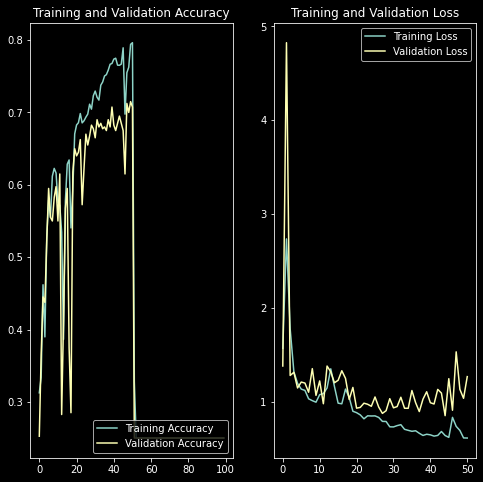

In [6]:
plot_training(history)

In [4]:
# train_data.reset()
# val_data.reset()
epochs=50
history1 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    # callbacks=[callback]
)


Epoch 1/50
150/150 [==============================] - 52s 344ms/step - loss: 2.2044 - accuracy: 0.2852 - val_loss: 1.3788 - val_accuracy: 0.2525

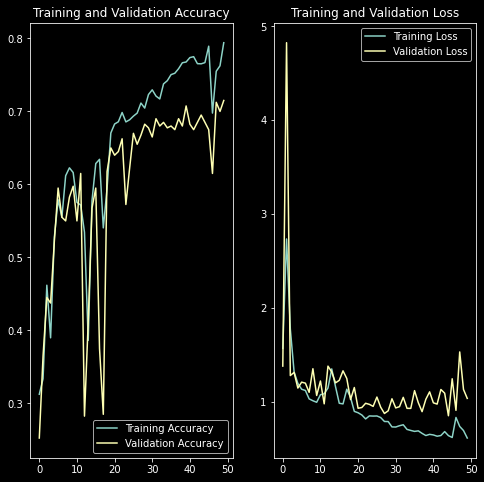

In [5]:
plot_training(history1)

In [5]:
from datetime import datetime
datetime.now().strftime("%Y%m%d-%H%M%S")

'20210330-125901'